## Use case：Identify customers who are likely to churn in the future. Furthermore, I analyze top factors that influence user retention.    [Dataset information](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers)



### Part 0: Load Data and Packages

In [3]:
#import neccessary libraries
import numpy as np
import pandas as pd
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
plt.rcParams.update({'font.size': 15})
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [4]:
bank_churn = pd.read_csv('bank_churn.csv')
bank_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


### Part 1: Data Exploration


#### Part 1.1: Overview

In [5]:
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
bank_churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
bank_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
y = bank_churn['Exited']

In [9]:
bank_churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#### Part 1.2: Understand Numerical Features

In [10]:
# check the feature distribution
# understand Numerical feature
bank_churn[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,100090.240
std,96.653,10.488,2.892,62397.405,0.582,57510.493
min,350.000,18.000,0.000,0.000,1.000,11.580
25%,584.000,32.000,3.000,0.000,1.000,51002.110
50%,652.000,37.000,5.000,97198.540,1.000,100193.915
75%,718.000,44.000,7.000,127644.240,2.000,149388.247
max,850.000,92.000,10.000,250898.090,4.000,199992.480


As can be seen from the above table, there is a huge difference between minimal and maximum value of `EstimatedSalary`. It's more likely that the minimal value is average daily wage.

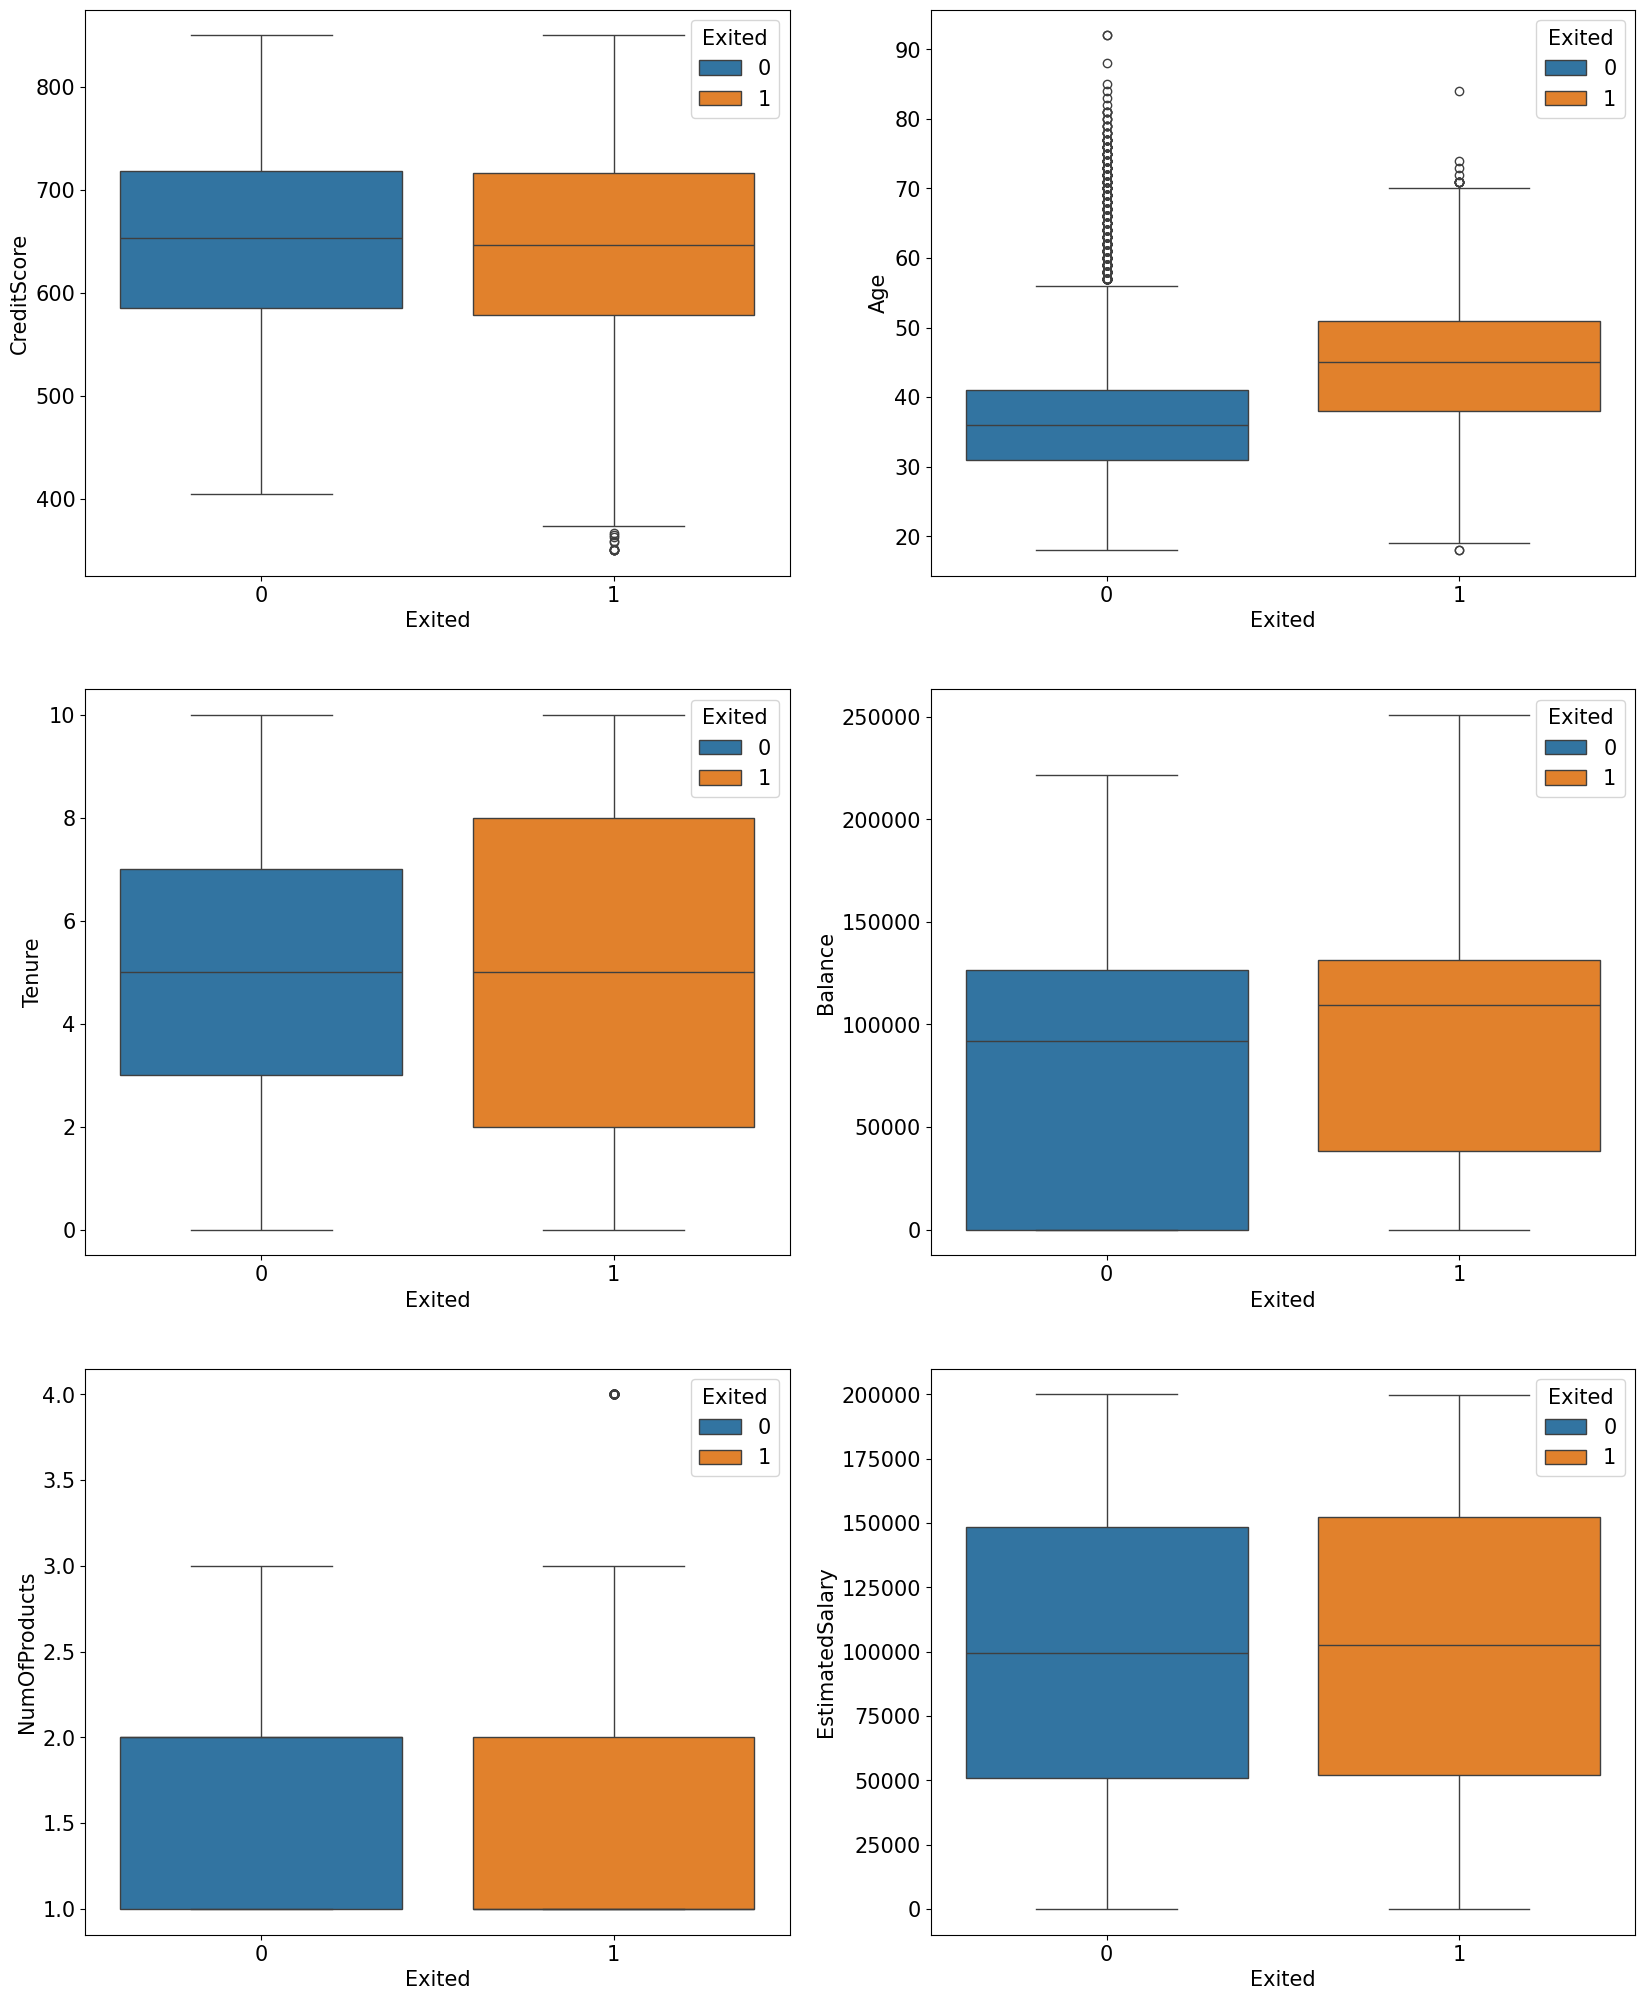

In [11]:
fig, axes = plt.subplots(3, 2, figsize = (20,25))
sns.boxplot(x='Exited', y ='CreditScore', hue='Exited', data = bank_churn, ax = axes[0][0])
sns.boxplot(x='Exited', y ='Age', hue='Exited', data = bank_churn, ax = axes[0][1])
sns.boxplot(x='Exited', y ='Tenure', hue='Exited', data = bank_churn, ax = axes[1][0])
sns.boxplot(x='Exited', y ='Balance', hue='Exited', data = bank_churn, ax = axes[1][1])
sns.boxplot(x='Exited', y ='NumOfProducts', hue='Exited', data = bank_churn, ax = axes[2][0])
sns.boxplot(x='Exited', y ='EstimatedSalary', hue='Exited', data = bank_churn, ax=axes[2][1])
plt.show()

As can be seen from the above figure, the distribution of `CreditScore` and `EstimatedSalary` in `Exited` is about the same, indicating that they have little impact on the response variable.

#### Part 1.3: Understand Categorical Features

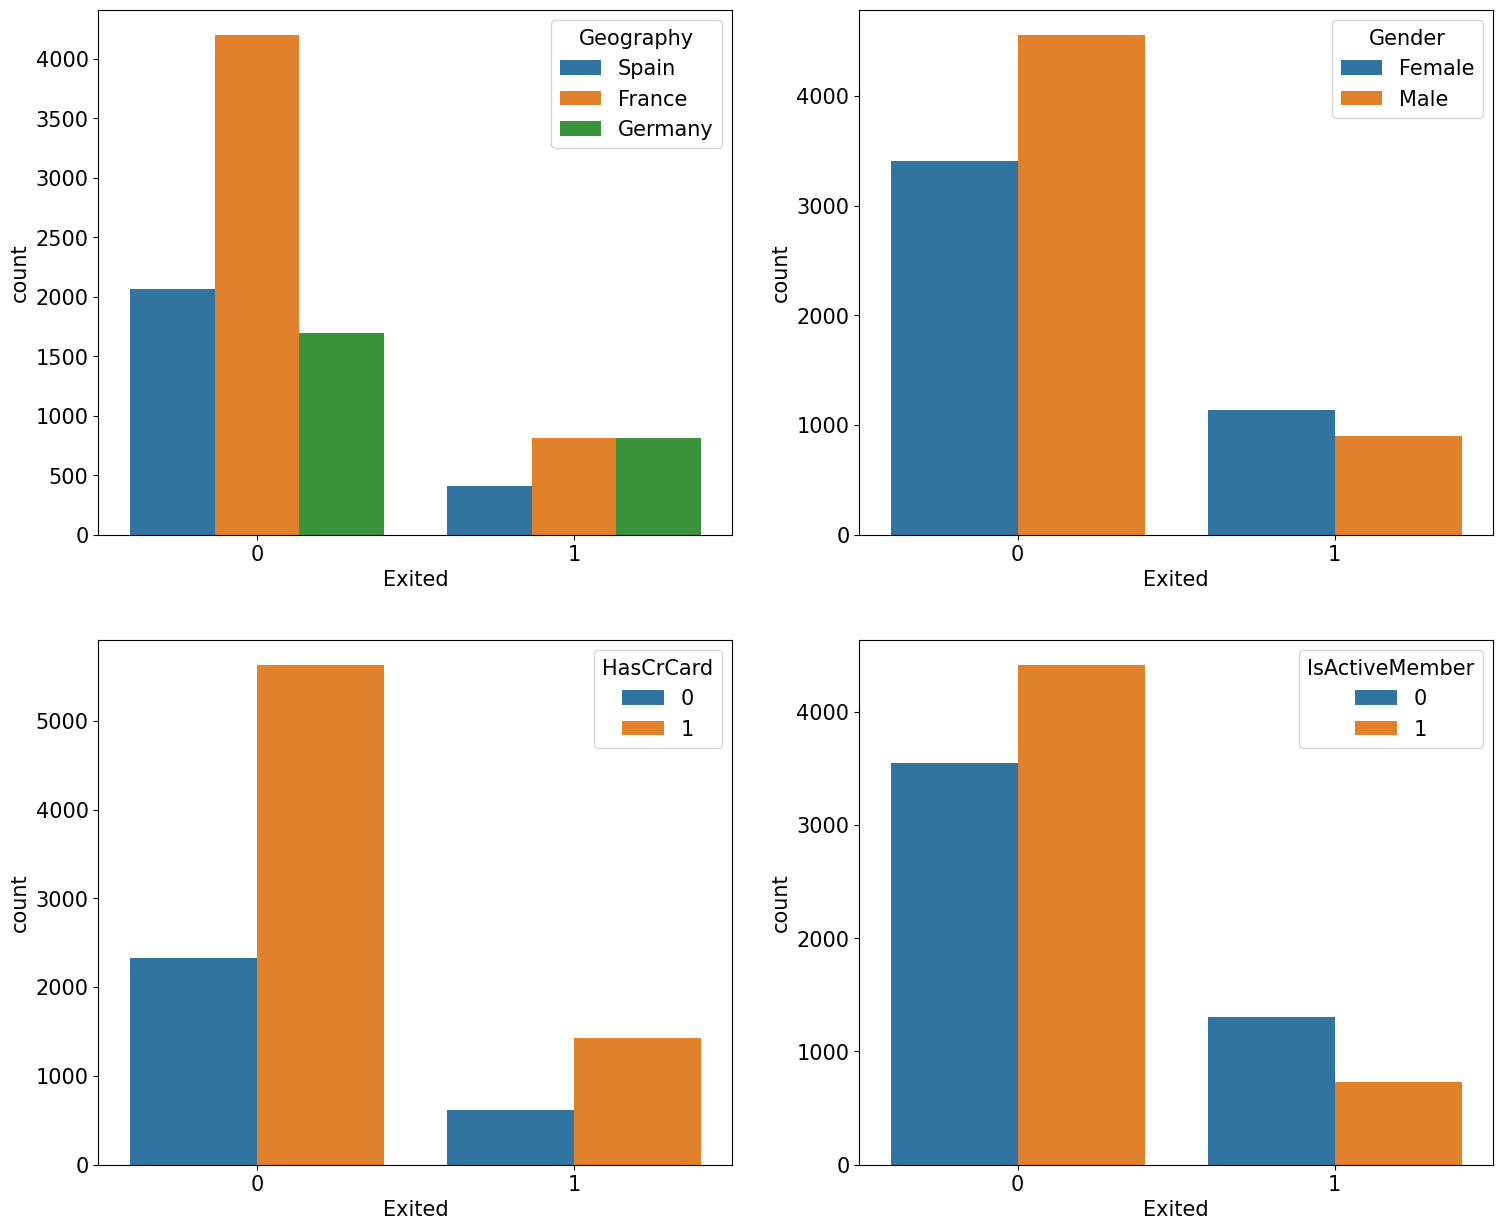

In [12]:
# understand categorical feature
fig, axes = plt.subplots(2, 2, figsize = (18,15))
sns.countplot(x='Exited', hue='Geography', data = bank_churn, ax = axes[0][0])
sns.countplot(x='Exited', hue='Gender', data = bank_churn, ax = axes[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data = bank_churn, ax = axes[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data = bank_churn, ax = axes[1][1])
plt.show()

The difference between exited and not exited of each categorial variable is quite significant.

### Part 2: Feature Preprocessing


#### Part 2.1: Drop Useless Features

In [13]:
to_drop = ['RowNumber','CustomerId','Surname','Exited']
df = bank_churn.drop(to_drop, axis=1)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.000,1,1,1,101348.880
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580
2,502,France,Female,42,8,159660.800,3,1,0,113931.570
3,699,France,Female,39,1,0.000,2,0,0,93826.630
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100


In [15]:
cat_cols = df.columns[df.dtypes == 'object']
num_cols = df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]

In [16]:
cat_cols

Index(['Geography', 'Gender'], dtype='object')

In [17]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

#### Part 2.2: Tain/Test Split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size=0.25, stratify = y, random_state = 0)

print('Training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('Test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

Training data has 7500 observation with 10 features
Test data has 2500 observation with 10 features




```
stratify example:
100% -> y: 80 '0', 20 '1' -> 4:1
80% training 64: '0', 16:'1' -> 4:1
20% testing  16:'0', 4: '1' -> 4:1
```



In [19]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9414,544,Spain,Female,53,9,0.000,1,1,0,125692.070
3363,747,Germany,Male,38,2,129728.600,1,1,0,89289.540
2979,642,France,Male,40,1,154863.150,1,1,1,138052.510
578,593,France,Female,41,6,0.000,1,1,0,65170.660
7984,464,France,Male,46,6,161798.530,1,1,0,182944.470


#### Part 2.3: Feature Encoding

In [20]:
def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)


In [21]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,544,Female,53,9,0.000,1,1,0,125692.070,0.000,0.000,1.000
1,747,Male,38,2,129728.600,1,1,0,89289.540,0.000,1.000,0.000
2,642,Male,40,1,154863.150,1,1,1,138052.510,1.000,0.000,0.000
3,593,Female,41,6,0.000,1,1,0,65170.660,1.000,0.000,0.000
4,464,Male,46,6,161798.530,1,1,0,182944.470,1.000,0.000,0.000


In [22]:
# Ordinal encoding
categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [23]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,544,0.000,53,9,0.000,1,1,0,125692.070,0.000,0.000,1.000
1,747,1.000,38,2,129728.600,1,1,0,89289.540,0.000,1.000,0.000
2,642,1.000,40,1,154863.150,1,1,1,138052.510,1.000,0.000,0.000
3,593,0.000,41,6,0.000,1,1,0,65170.660,1.000,0.000,0.000
4,464,1.000,46,6,161798.530,1,1,0,182944.470,1.000,0.000,0.000


#### Part 2.4: Standardize/Normalize Data

In [24]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [25]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-1.100,0.000,1.355,1.392,-1.234,-0.902,0.645,-1.037,0.443,0.000,0.000,1.000
1,1.002,1.000,-0.084,-1.033,0.850,-0.902,0.645,-1.037,-0.189,0.000,1.000,0.000
2,-0.085,1.000,0.108,-1.380,1.254,-0.902,0.645,0.964,0.657,1.000,0.000,0.000
3,-0.592,0.000,0.204,0.353,-1.234,-0.902,0.645,-1.037,-0.608,1.000,0.000,0.000
4,-1.928,1.000,0.683,0.353,1.365,-0.902,0.645,-1.037,1.437,1.000,0.000,0.000


### Part 3: Model training and Result Evaluation

#### Part 3.1: Model Training

In [26]:
# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [27]:
# Train the model
classifier_logistic.fit(X_train, Y_train)

LogisticRegression()

In [28]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
# Accuracy of test data
classifier_logistic.score(X_test, Y_test)

0.8088

#### Part 3.2: Use Grid Search to Find Optimal Hyperparameters
alternative:random search

In [30]:
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

##### Part 3.2.1: Find Optimal Hyperparameters - LogisticRegression

In [31]:
# C is the 1/lambda value(weight) for L1 and L2
# solver: algorithm to find the weights that minimize the cost function
# ('l1', 0.01)('l1', 0.05) ('l1', 0.1) ('l1', 0.2)('l1', 1)
# ('12', 0.01)('l2', 0.05) ('l2', 0.1) ('l2', 0.2)('l2', 1)
parameters = {
    'penalty':('l2','l1'),
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv=5)
Grid_LR.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l2', 'l1')})

In [32]:
print_grid_search_metrics(Grid_LR)

Best score: 0.8109333333333334
Best parameters set:
C:0.1
penalty:l1


In [33]:
#best model
best_LR_model = Grid_LR.best_estimator_

In [34]:
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
best_LR_model.score(X_test, Y_test)

0.81

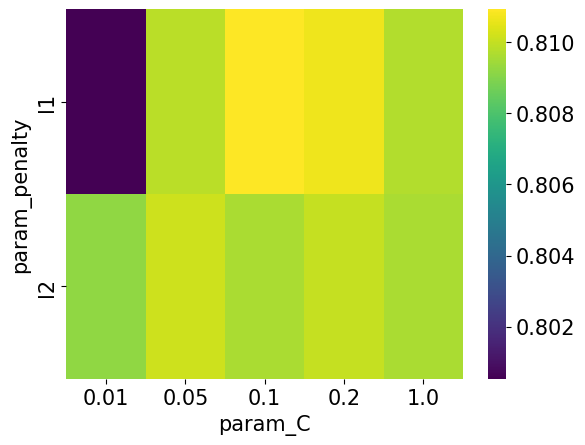

In [36]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
        )
heapmap_lr = sns.heatmap(res, cmap='viridis')

##### Part 3.2.2: Find Optimal Hyperparameters - KNN

In [37]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier() , parameters, cv=5)
Grid_KNN.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [38]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.8434666666666667
Best parameters set:
n_neighbors:9


In [39]:
best_KNN_model = Grid_KNN.best_estimator_

##### Part 3.2.3: Find Optimal Hyperparameters - Random Forest

In [40]:
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
Grid_RF.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [41]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8642666666666667
Best parameters set:
max_depth:10
n_estimators:100


In [42]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

#### Part 3.3: Model Evaluation

##### Part 3.3.1: Precision, Recall, Accuracy

In [43]:
models = {"Logistic Regression": best_LR_model, "K nearest neighbor": best_KNN_model, "Random Forest": best_RF_model}
for k, v in models.items():
    print(k + ":")
    print("Accuracy is: ", accuracy_score(Y_test, v.predict(X_test)))
    print("Precision is: ", precision_score(Y_test, v.predict(X_test)))
    print("Recall is: ", recall_score(Y_test, v.predict(X_test)))
    print()


Logistic Regression:
Accuracy is:  0.81
Precision is:  0.6011904761904762
Recall is:  0.19842829076620824

K nearest neighbor:
Accuracy is:  0.838
Precision is:  0.696969696969697
Recall is:  0.3614931237721022

Random Forest:
Accuracy is:  0.8592
Precision is:  0.8007662835249042
Recall is:  0.4106090373280943



In [44]:
# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(Y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(Y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(Y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8592
precision is: 0.8007662835249042
recall is: 0.4106090373280943

Logistic Regression
Accuracy is: 0.81
precision is: 0.6011904761904762
recall is: 0.19842829076620824

K nearest neighbor
Accuracy is: 0.838
precision is: 0.696969696969697
recall is: 0.3614931237721022



##### Part 3.2.2: ROC & AUC

In [45]:
# Use predict_proba to get the probability results of Random Foresty_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
best_RF_model.predict_proba(X_test)

array([[0.94275003, 0.05724997],
       [0.86146645, 0.13853355],
       [0.97608649, 0.02391351],
       ...,
       [0.78943539, 0.21056461],
       [0.85195207, 0.14804793],
       [0.81203706, 0.18796294]])

In [46]:
Y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(Y_test, Y_pred_rf)

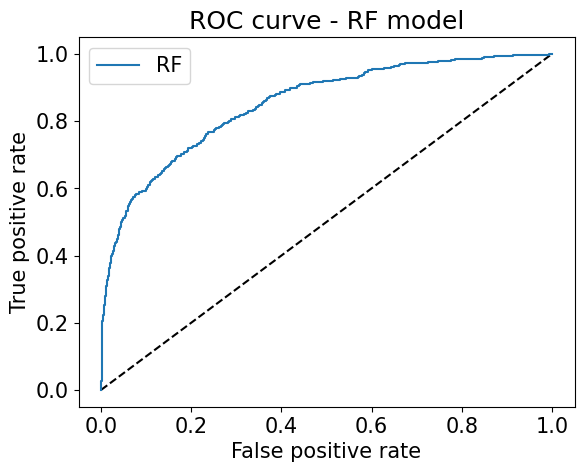

In [47]:
# ROC curve of Random Forest result

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [48]:
print(auc(fpr_rf, tpr_rf))

0.851799699828008


### Part 4: Random Forest Model - Feature Importance Discussion

In [49]:
X_RF = df.copy()

X_RF = OneHotEncoding(X_RF, enc_ohe, ['Geography'])
X_RF['Gender'] = enc_oe.transform(X_RF[['Gender']])

X_RF.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.000,42,2,0.000,1,1,1,101348.880,1.000,0.000,0.000
1,608,0.000,41,1,83807.860,1,0,1,112542.580,0.000,0.000,1.000
2,502,0.000,42,8,159660.800,3,1,0,113931.570,1.000,0.000,0.000
3,699,0.000,39,1,0.000,2,0,0,93826.630,1.000,0.000,0.000
4,850,0.000,43,2,125510.820,1,1,1,79084.100,0.000,0.000,1.000


In [50]:
rf_model = best_RF_model.fit(X_RF, y)

In [51]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

In [52]:
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for i in range(X_RF.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[i]],round(importances[indices[i]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.3175
NumOfProducts : 0.2254
Balance : 0.1051
CreditScore : 0.0758
EstimatedSalary : 0.0756
IsActiveMember : 0.0715
Tenure : 0.0407
Geography_Germany : 0.0387
Gender : 0.02
Geography_France : 0.0112
HasCrCard : 0.0101
Geography_Spain : 0.0085


As can be seen from the result, `Age` is the most important feature that influences user retention.